In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

<h1>Challenge 1.3</h1>
<h4>Note: I have used the code without the drag coefficient as the homework said only to use a position dependent gravity without drag</h4>

In [2]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt


In [3]:
def exercise_1_3(y0, v0, vt, dt):
    g = 9.8            # g acceleration
    mass = 0.01        # mass of the particle
    #y0 = 300.          # initial position
    #v0 = 0.            # initial velocity
    #vt = 30.           # terminal velocity

    #dt = 0.5           # time step
    
    R = 6.37e6
    gforce = g*mass    # weight

    p = particle(mass, y0, v0)
    m = p.mass

    y = [y0] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    t = [0.]

    while p.y > 0.:
        fy = -( g*m )/( 1 + (y[-1]/R) )**2
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)

    t_data = np.array(t) # we convert the list into a numpy array for plotting
    y_data = np.array(y)
    v_data = np.array(v)
    return t_data, y_data, v_data

    #for i in range(0,t_data.size):
    #    print i,t_data[i], y_data[i], v_data[i]

In [4]:
def compare(y0, v0, vt, dt):
    analytical_vf = -np.sqrt( v0**2 + 2*9.8*y0 )
    t, y, v = exercise_1_3(y0, v0, vt, dt)
    vf = v[-1]
    percent_diff = abs ( (analytical_vf - vf)/analytical_vf )*100
    return percent_diff

In [5]:
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
dt = 0.01          # time step, decreased from the example given

tol = 1e-4         # When searching for a value within 1%, just look for equivalence within this tolerance

# Search for the 

percent_diff = compare(y0, v0, vt, dt)
print(percent_diff)

# percent_diff is much lower than 1%, find something drastically higher
y0 = 6.37e6       # Using R as the first value
percent_diff = compare(y0, v0, vt, dt)
print(percent_diff)

# 1% difference lies somewhere between these two values
upper_y0 = 6.37e6
lower_y0 = 300
check = True
res = ()
while check:
    y_check = (upper_y0 + lower_y0)/2
    percent_diff = compare(y_check, v0, vt, dt)
    
    if percent_diff > 1:
        upper_y0 = y_check
    elif percent_diff < 1:
        lower_y0 = y_check
    
    check = not abs(1 - percent_diff) < tol
    if not check:
        res = (y_check, percent_diff)

print("At y0 = ", res[0], "Results are off by ", round(res[1], 5))

0.06261987145503226
29.288593900491772
At y0 =  129941.4876461029 Results are off by  1.0


At about y0 = 1.299e5 m, the results differ by 1%. Any higher, and the difference is greater. Constant acceleration is a really good approximation

<h1>Challenge 1.4</h1>

In [6]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

Text(0, 0.5, 'Max X (m)')

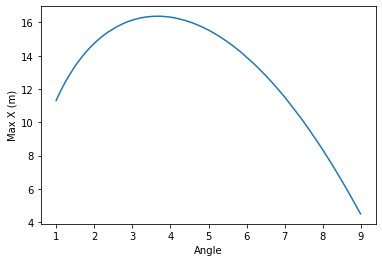

In [8]:
g = 9.8            # g acceleration
v0 = 30.           # initial velocity

dt = 0.001           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

highest_y = []
highest_x = []
angles = np.arange( 1, 9, 0.01 )

for angle in angles:
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]
    
    p = particle2(1., 0., 0., vx[0], vy[0])
    m = p.mass
    k = 0.1*m                             # k/m = 0.1 so k = 0.1*m
    while p.y >= 0.:
        curr_vx = p.vx
        curr_vy = p.vy
        curr_v = np.sqrt( curr_vx**2 + curr_vy**2 )
        fx = -k*curr_v*curr_vx
        fy = -m*g - k*curr_v*curr_vy
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)
    highest_x.append(max(x))
    highest_y.append(max(y))

    #my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    #pyplot.legend()

pyplot.plot(angles, highest_x)
pyplot.xlabel("Angle")
pyplot.ylabel("Max X (m)")
#pyplot.xlabel('position x(m)')
#pyplot.ylabel('position y(m)');

In [9]:
ind = 0
for i in range(len(highest_x)):
    if highest_x[i] == max(highest_x):
        ind = i
        break

print("Maximum range of: ", highest_x[ind])
print("At an angle of: ", round(angles[ind]*0.1, 4), "*(Pi/2) radians")

Maximum range of:  16.373520312554408
At an angle of:  0.367 *(Pi/2) radians
